In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout,Activation

import time

# 데이터 준비

## 데이터 다운로드

In [0]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()
num_classes = 10
#raw_train_y = tf.keras.utils.to_categorical(raw_train_y, num_classes)
#raw_test_y = tf.keras.utils.to_categorical(raw_test_y, num_classes)


In [23]:
print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


[6]


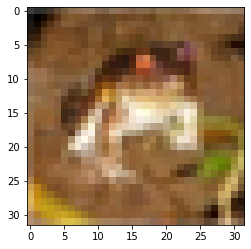

[9]


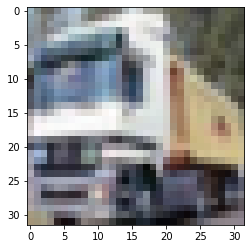

[9]


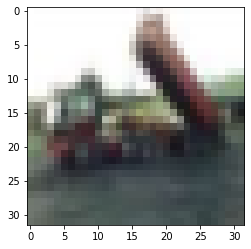

[4]


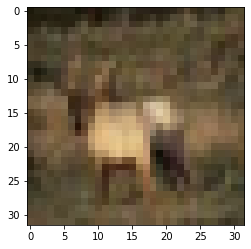

In [24]:
for i in range(4):
  print(raw_train_y[i])
  plt.imshow(raw_train_x[i], cmap=plt.cm.binary)
  plt.show()


## Normalization

In [25]:
print(np.max(raw_train_x[:,]))
print(np.max(raw_test_x[:,]))

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

print(np.max(train_x[:,]))
print(np.max(test_x[:,]))


255
255
1.0
1.0


In [26]:
data_count = train_x.shape[0]
data_size = train_x.shape[1]*train_x.shape[2]*train_x.shape[3]
train_x = train_x.reshape((data_count, data_size))

data_count = test_x.shape[0]
test_x = test_x.reshape((data_count, data_size))

print(train_x.shape)
print(test_x.shape)

(50000, 3072)
(10000, 3072)


# 모델 준비

In [38]:
model = keras.Sequential()
# model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(300, activation='relu', input_shape=(32*32*3,)))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
# model.add(Dense(3, activation='softmax'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 300)               921900    
_________________________________________________________________
dense_33 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_34 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                3010      
Total params: 1,105,510
Trainable params: 1,105,510
Non-trainable params: 0
_________________________________________________________________


In [39]:
# start_time = time.time() # REMOVED
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
# print("elapsed : {}".format(time.time() - start_time)) # REMOVED

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 8s 157us/sample - loss: 1.8500 - acc: 0.3259
Epoch 2/5
50000/50000 [==============================] - 8s 156us/sample - loss: 1.6472 - acc: 0.4089
Epoch 3/5
50000/50000 [==============================] - 8s 157us/sample - loss: 1.5599 - acc: 0.4401
Epoch 4/5
50000/50000 [==============================] - 8s 155us/sample - loss: 1.5029 - acc: 0.4643
Epoch 5/5
50000/50000 [==============================] - 8s 153us/sample - loss: 1.4643 - acc: 0.4756


In [29]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

10000/10000 [==============================] - 1s 60us/sample - loss: 1.5492 - acc: 0.4497
loss= 1.5491666135787965
acc= 0.4497


**다른 모델 테스트**

In [36]:
model = keras.Sequential()
# model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(300, activation='relu', input_shape=(32*32*3,)))
model.add(BatchNormalization())
model.add(Dense(300, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(300, activation='relu'))
model.add(BatchNormalization())

# model.add(Dense(3, activation='softmax'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# start_time = time.time() # REMOVED
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
# print("elapsed : {}".format(time.time() - start_time)) # REMOVED

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 9s 183us/sample - loss: 1.6949 - acc: 0.4001
Epoch 2/5
50000/50000 [==============================] - 9s 180us/sample - loss: 1.4783 - acc: 0.4748
Epoch 3/5
50000/50000 [==============================] - 9s 180us/sample - loss: 1.3867 - acc: 0.5070
Epoch 4/5
50000/50000 [==============================] - 9s 179us/sample - loss: 1.3298 - acc: 0.5277
Epoch 5/5
50000/50000 [==============================] - 9s 177us/sample - loss: 1.2656 - acc: 0.5516


In [40]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

10000/10000 [==============================] - 2s 157us/sample - loss: 1.4710 - acc: 0.4724
loss= 1.4710075206756592
acc= 0.4724


**CNN 모델**

In [52]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout,Activation

import time


(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()
num_classes = 10
#raw_train_y = tf.keras.utils.to_categorical(raw_train_y, num_classes)
#raw_test_y = tf.keras.utils.to_categorical(raw_test_y, num_classes)

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

print(np.max(raw_train_x[:,]))
print(np.max(raw_test_x[:,]))

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

print(np.max(train_x[:,]))
print(np.max(test_x[:,]))


#data_count = train_x.shape[0]
#data_size = train_x.shape[1]*train_x.shape[2]*train_x.shape[3]
#train_x = train_x.reshape((data_count, data_size))

#data_count = test_x.shape[0]
#test_x = test_x.reshape((data_count, data_size))
print("train data shape:")
print(train_x.shape)
print("test data shape:")
print(test_x.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
255
255
1.0
1.0
train data shape:
(50000, 32, 32, 3)
test data shape:
(10000, 32, 32, 3)


In [54]:
model = keras.Sequential()
# model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32,32,3,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

#model.add(BatchNormalization())

# model.add(Dense(3, activation='softmax'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# start_time = time.time() # REMOVED
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
# print("elapsed : {}".format(time.time() - start_time)) # REMOVED

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 287s 6ms/sample - loss: 2.0281 - acc: 0.3527
Epoch 2/5
50000/50000 [==============================] - 310s 6ms/sample - loss: 1.7182 - acc: 0.4794
Epoch 3/5
50000/50000 [==============================] - 309s 6ms/sample - loss: 1.4711 - acc: 0.5449
Epoch 4/5
50000/50000 [==============================] - 339s 7ms/sample - loss: 1.2709 - acc: 0.5952
Epoch 5/5
50000/50000 [==============================] - 299s 6ms/sample - loss: 1.1025 - acc: 0.6732


In [0]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

[[2.1714184e-02 7.5605214e-02 1.1509713e-01 ... 1.3485585e-03
  4.5956213e-02 2.5326088e-03]
 [2.6146414e-02 8.4959105e-02 7.2211102e-03 ... 5.2175205e-04
  1.3119303e-01 7.4686909e-01]
 [2.1088597e-01 1.8225595e-01 1.0953098e-02 ... 5.9671379e-03
  3.8375387e-01 1.9293891e-01]
 ...
 [2.9126368e-03 2.1661462e-03 8.9790858e-02 ... 5.5134233e-02
  2.4347065e-02 6.1081308e-03]
 [9.8668104e-03 3.9922995e-03 2.5790462e-01 ... 4.5686867e-02
  3.6497167e-03 5.7552271e-03]
 [6.6305116e-02 7.7538565e-03 8.8354185e-02 ... 5.9462452e-01
  1.1251152e-02 5.7330630e-03]]
[3 9 8 ... 5 2 7]
[3]


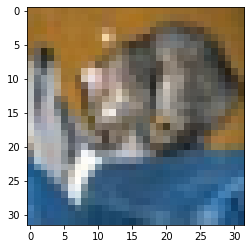

[8]


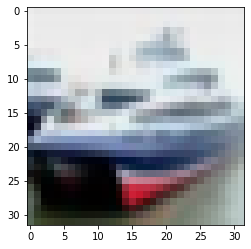

[8]


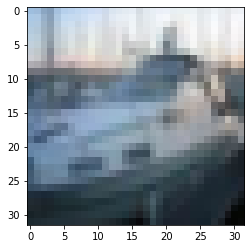

[0]


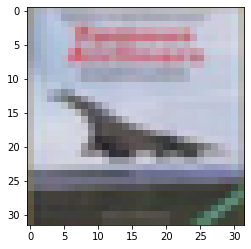

In [30]:
y_ = model.predict(test_x)
print(y_)
predicted = np.argmax(y_, axis=1)
print(predicted)

for i in range(4):
  print(raw_test_y[i])
  plt.imshow(raw_test_x[i], cmap=plt.cm.binary)
  plt.show()

# 한눈에 모아보면

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time

In [0]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

train_x = train_x.reshape((60000, 28*28))
test_x = test_x.reshape((10000, 28*28))


In [0]:
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.9044 - acc: 0.7136
Epoch 2/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3927 - acc: 0.8880
Epoch 3/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3307 - acc: 0.9058
Epoch 4/5
60000/60000 [==============================] - 1s 21us/sample - loss:

# Flatten 레이어 사용

(None, 28, 28) shape의 train_x를 그대로 사용.

모델의 처음에 Flatten() 레이어를 두어, 입력 모양을 변경한다.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time

In [0]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

# data_count = train_x.shape[0] # COMMENT OUT
# data_size = train_x.shape[1]*train_x.shape[2] # COMMENT OUT
# train_x = train_x.reshape((data_count, data_size)) # COMMENT OUT

# data_count = test_x.shape[0] # COMMENT OUT
# test_x = test_x.reshape((data_count, data_size)) # COMMENT OUT


In [0]:

model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28))) # ADD
# model.add(Dense(10, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8862 - acc: 0.7278
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3659 - acc: 0.8950
Epoch 3/5
60000/60000 [=========================

# DNN classification Template

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time


(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x/255
test_x = test_x/255


model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 22us/sample - loss: 1.0497 - acc: 0.6647
Epoch 2/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.4016 - acc: 0.8855
Epoch 3/5
60000/60000 [========================

# Normalization

## Normalization을 하지 않으면

위에서는 0 ~ 255의 값을 0 ~ 1로 normalization하여 학습했다.

이 과정을 생략하고 그대로 실행한다.

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255



In [0]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 18us/sample - loss: 2.4654 - acc: 0.1538
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 1.9504 - acc: 0.2509
Epoch 3/5
60000/60000 [=========================

학습이 진행되지만 normalization했을 때와 비교하면 더디게 진행된다.

아래는 0~1로 normalization을 했을 때
```
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8862 - acc: 0.7278
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3659 - acc: 0.8950
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3164 - acc: 0.9100
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2904 - acc: 0.9171
Epoch 5/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2724 - acc: 0.9225
10000/10000 [==============================] - 0s 27us/sample - loss: 0.2613 - acc: 0.9265
loss= 0.26132496373653413
acc= 0.9265
```

## -1 ~ 1로 Normalization 하면

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x/127.5 - 1
test_x = test_x/127.5 - 1


In [0]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 21us/sample - loss: 1.3357 - acc: 0.5336
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.7027 - acc: 0.7702
Epoch 3/5
60000/60000 [=========================

학습이 진행되지만 normalization했을 때와 비교하면 더디게 진행된다.

아래는 0~1로 normalization을 했을 때
```
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8862 - acc: 0.7278
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3659 - acc: 0.8950
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3164 - acc: 0.9100
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2904 - acc: 0.9171
Epoch 5/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2724 - acc: 0.9225
10000/10000 [==============================] - 0s 27us/sample - loss: 0.2613 - acc: 0.9265
loss= 0.26132496373653413
acc= 0.9265
```

## -255 ~ 255로 하면

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x*2 - 255
test_x = test_x*2 - 255

In [0]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 18us/sample - loss: 4.1636 - acc: 0.1091
Epoch 2/5
60000/60000 [==============================] - 1s 17us/sample - loss: 2.3027 - acc: 0.1123
Epoch 3/5
60000/60000 [=========================

학습이 진행되지만 normalization 안했을 때 보다 더디게 진행된다.

아래는 normalization을 안했을 때
```
Epoch 1/5
60000/60000 [==============================] - 1s 18us/sample - loss: 2.4654 - acc: 0.1538
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 1.9504 - acc: 0.2509
Epoch 3/5
60000/60000 [==============================] - 1s 17us/sample - loss: 1.7553 - acc: 0.3037
Epoch 4/5
60000/60000 [==============================] - 1s 18us/sample - loss: 1.6404 - acc: 0.3354
Epoch 5/5
60000/60000 [==============================] - 1s 18us/sample - loss: 1.5597 - acc: 0.3471
10000/10000 [==============================] - 0s 26us/sample - loss: 1.5352 - acc: 0.3417
loss= 1.5351685056686402
acc= 0.3417
```

## 0 ~ 0.5로 하면

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x/255/2
test_x = test_x/255/2

In [0]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 1.0266 - acc: 0.6823
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.4344 - acc: 0.8783
Epoch 3/5
60000/60000 [=========================

학습이 되며 0~1로 normalization했을 때 보다 살짝 더디다

아래는 0~1로 normalization을 했을 때
```
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8862 - acc: 0.7278
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3659 - acc: 0.8950
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3164 - acc: 0.9100
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2904 - acc: 0.9171
Epoch 5/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2724 - acc: 0.9225
10000/10000 [==============================] - 0s 27us/sample - loss: 0.2613 - acc: 0.9265
loss= 0.26132496373653413
acc= 0.9265
```

## 0 ~ 2로 하면

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x/255*2
test_x = test_x/255*2

In [0]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.7630 - acc: 0.7654
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3363 - acc: 0.9045
Epoch 3/5
60000/60000 [=========================

학습이 되며 0~1로 normalization했을 때 보다 살짝 빠르다

아래는 0~1로 normalization을 했을 때
```
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8862 - acc: 0.7278
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3659 - acc: 0.8950
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3164 - acc: 0.9100
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2904 - acc: 0.9171
Epoch 5/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2724 - acc: 0.9225
10000/10000 [==============================] - 0s 27us/sample - loss: 0.2613 - acc: 0.9265
loss= 0.26132496373653413
acc= 0.9265
```